In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
path = "HomeC.csv"
dataset = pd.read_csv(path, low_memory=False)
dataset.head()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


<Axes: >

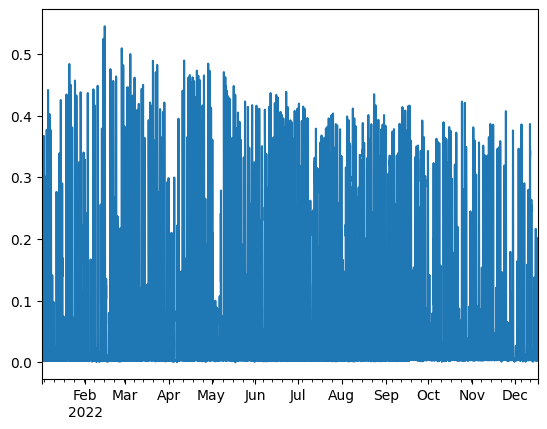

In [190]:
dataset["gen"].plot()

In [127]:
dataset["use"]

2022-01-01 05:00:00    1.044130
2022-01-01 06:00:00    0.918167
2022-01-01 07:00:00    0.714736
2022-01-01 08:00:00    0.960013
2022-01-01 09:00:00    0.639836
                         ...   
2022-12-16 23:00:00    1.096999
2022-12-17 00:00:00    1.276585
2022-12-17 01:00:00    1.260231
2022-12-17 02:00:00    1.100358
2022-12-17 03:00:00    1.840413
Freq: H, Name: use, Length: 8399, dtype: float64

In [130]:
dataset["Solar"]==dataset["gen"]

2022-01-01 05:00:00    True
2022-01-01 06:00:00    True
2022-01-01 07:00:00    True
2022-01-01 08:00:00    True
2022-01-01 09:00:00    True
                       ... 
2022-12-16 23:00:00    True
2022-12-17 00:00:00    True
2022-12-17 01:00:00    True
2022-12-17 02:00:00    True
2022-12-17 03:00:00    True
Freq: H, Length: 8399, dtype: bool

In [85]:
dataset = dataset[0:-1]

In [86]:
dataset.columns = [col.replace(' [kW]', '') for col in dataset.columns]

In [87]:
dataset['sum_Furnace'] = dataset[['Furnace 1','Furnace 2']].sum(axis=1)
dataset['avg_Kitchen'] = dataset[['Kitchen 12','Kitchen 14','Kitchen 38']].mean(axis=1)
dataset = dataset.drop(['Kitchen 12','Kitchen 14','Kitchen 38'], axis=1)
dataset = dataset.drop(['Furnace 1','Furnace 2'], axis=1)

In [88]:
time_index = pd.date_range('2022-01-01 05:00', periods=len(dataset),  freq='min')  
time_index = pd.DatetimeIndex(time_index)
dataset = dataset.set_index(time_index)
dataset = dataset.drop(['time'], axis=1)

In [47]:
dataset.columns

Index(['use', 'gen', 'House overall', 'Dishwasher', 'Home office', 'Fridge',
       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'temperature', 'icon', 'humidity', 'visibility',
       'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability',
       'sum_Furnace', 'avg_Kitchen'],
      dtype='object')

<Axes: >

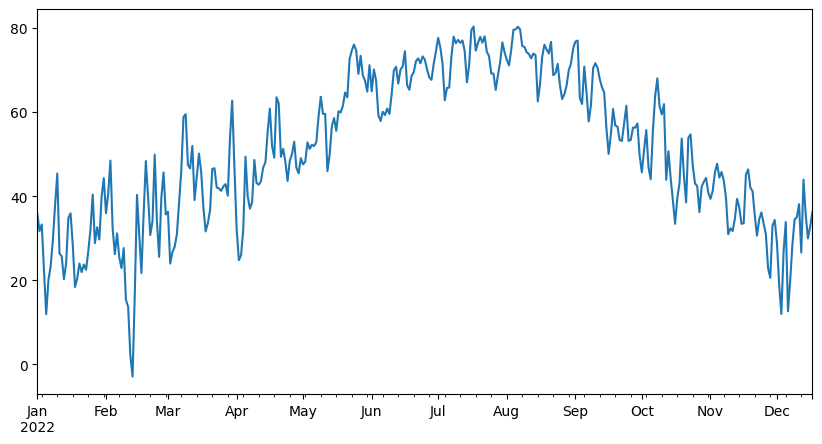

In [81]:
dataset["temperature"].resample("D").mean().plot(figsize=(10,5))

In [89]:
dataset = dataset.drop("House overall", axis=1)

In [90]:
df = dataset[["icon", "summary"]]
df.head()

,icon,summary
2022-01-01 05:00:00,clear-night,Clear
2022-01-01 05:01:00,clear-night,Clear
2022-01-01 05:02:00,clear-night,Clear
2022-01-01 05:03:00,clear-night,Clear
2022-01-01 05:04:00,clear-night,Clear


In [91]:
dataset = dataset.drop(["icon", "summary"], axis=1)
dataset.columns

Index(['use', 'gen', 'Dishwasher', 'Home office', 'Fridge', 'Wine cellar',
       'Garage door', 'Barn', 'Well', 'Microwave', 'Living room', 'Solar',
       'temperature', 'humidity', 'visibility', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability', 'sum_Furnace', 'avg_Kitchen'],
      dtype='object')

In [92]:
dataset['cloudCover'].replace(['cloudCover'], method='bfill', inplace=True)
dataset['cloudCover'] = dataset['cloudCover'].astype('float')

## Resampling the data

In [191]:
dataset = dataset.resample("H").mean()

In [114]:
dataset.columns

Index(['use', 'gen', 'Dishwasher', 'Home office', 'Fridge', 'Wine cellar',
       'Garage door', 'Barn', 'Well', 'Microwave', 'Living room', 'Solar',
       'temperature', 'humidity', 'visibility', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability', 'sum_Furnace', 'avg_Kitchen'],
      dtype='object')

In [196]:
weather_features = dataset[['temperature', 'humidity', 'dewPoint', 'pressure']]
energy_use = dataset['use']
weather_features = weather_features['2022-01-02 05:00:00':'2022-12-02 05:00:00']
weather_features['yesterday_use'] = energy_use['2022-01-01 05:00:00':'2022-12-01 05:00:00'].values
energy_use = dataset['use']['2022-01-02 05:00:00':'2022-12-02 05:00:00']
weather_features.shape, energy_use.shape

((8017, 5), (8017,))

In [197]:
x_train = weather_features[:6000]
y_train = energy_use[:6000]

x_test = weather_features[6000:]
y_test = energy_use[6000:]

x_train = np.reshape(x_train.values, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test.values, (x_test.shape[0], x_test.shape[1], 1))


x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6000, 5, 1), (6000,), (2017, 5, 1), (2017,))

In [234]:
import keras
from keras.layers import LSTM, Bidirectional, Dense, BatchNormalization, Activation
from keras.models import Sequential

In [244]:
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(BatchNormalization())
model.add(LSTM(units=64, return_sequences=True))
model.add(BatchNormalization())
model.add(LSTM(units=64))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(x_train, y_train, epochs = 10, batch_size = 64)

Epoch 1/10


2024-03-09 14:24:53.766699: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-09 14:24:54.021717: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-09 14:24:54.192382: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-09 14:24:54.377058: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-09 14:24:54.558900: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-09 14:24:54.866876: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 1/94 [..............................] - ETA: 4:10 - loss: 1.5170

2024-03-09 14:24:55.188930: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - 6s 37ms/step - loss: 0.6882
Epoch 2/10
94/94 [==============================] - 2s 17ms/step - loss: 0.6453
Epoch 3/10
94/94 [==============================] - 2s 21ms/step - loss: 0.6285
Epoch 4/10
94/94 [==============================] - 2s 18ms/step - loss: 0.6244
Epoch 5/10
94/94 [==============================] - 2s 20ms/step - loss: 0.6209
Epoch 6/10
94/94 [==============================] - 2s 18ms/step - loss: 0.6231
Epoch 7/10
94/94 [==============================] - 2s 18ms/step - loss: 0.6192
Epoch 8/10
94/94 [==============================] - 2s 17ms/step - loss: 0.6166
Epoch 9/10
94/94 [==============================] - 2s 18ms/step - loss: 0.6122
Epoch 10/10
94/94 [==============================] - 2s 17ms/step - loss: 0.6107


2024-03-09 14:25:25.218355: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-09 14:25:25.307461: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-09 14:25:25.406127: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  2/188 [..............................] - ETA: 11s 

2024-03-09 14:25:25.516928: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


188/188 [==============================] - 2s 6ms/step


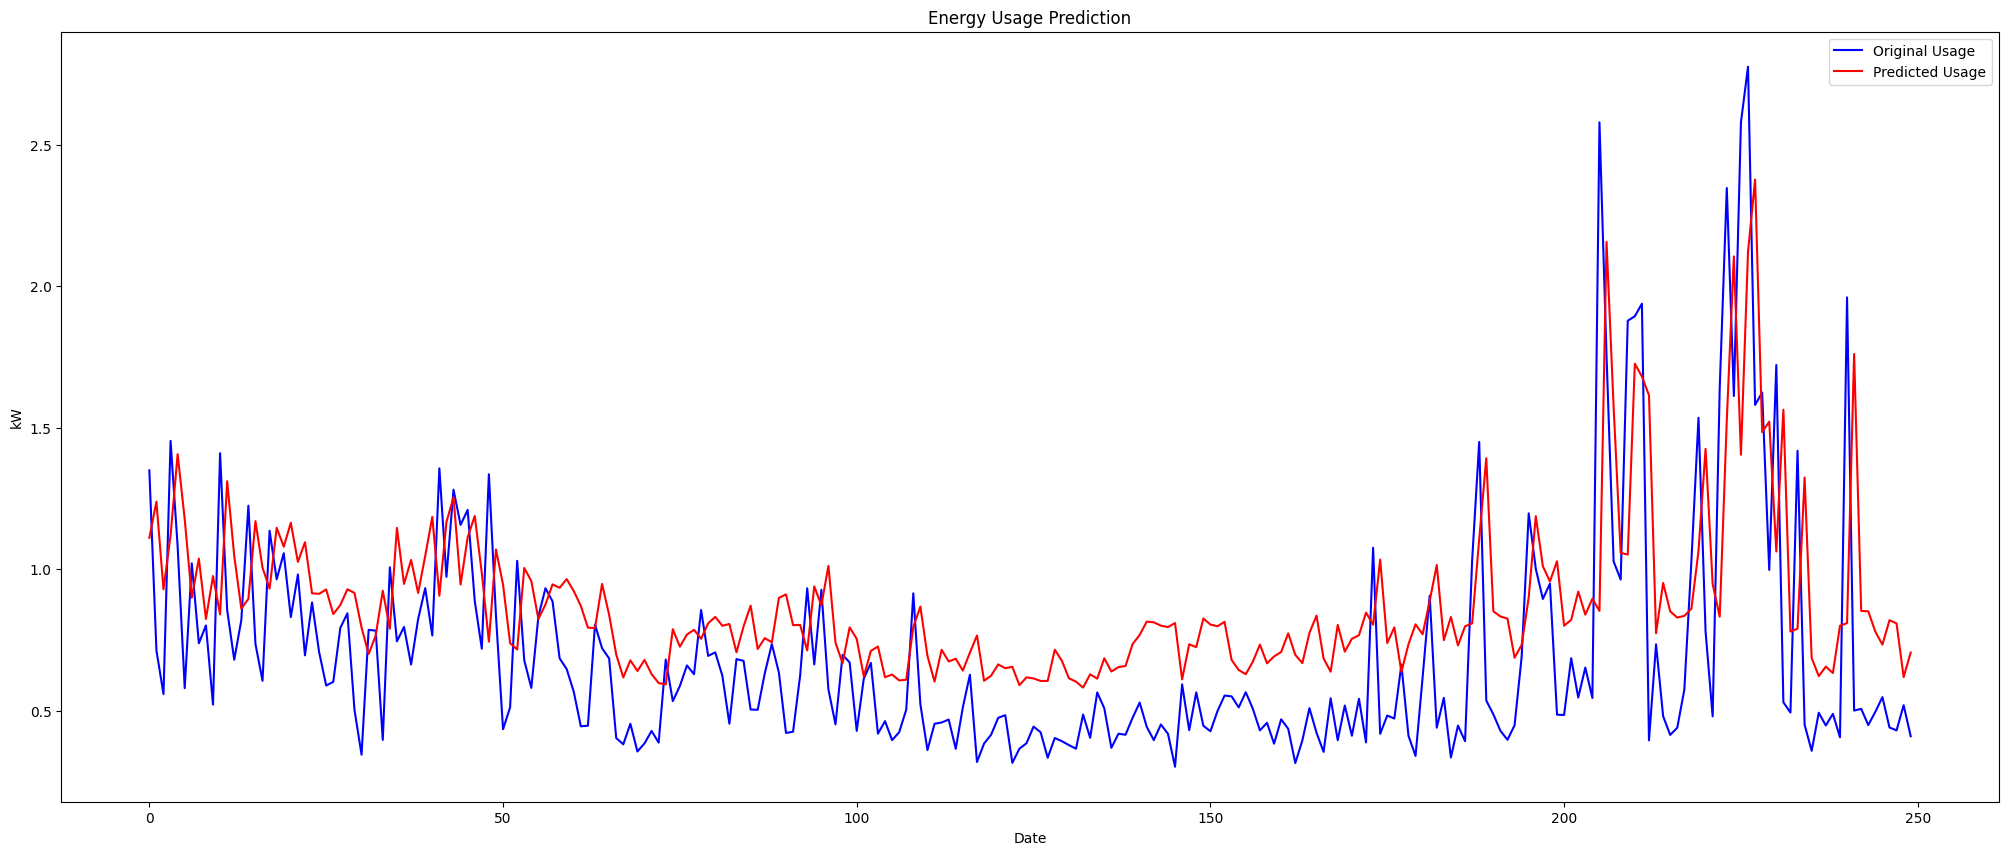

In [245]:
predictions = model.predict(x_train)
plt.figure(figsize=(25,10))
plt.plot(y_train.values[::24], color='blue', label='Original Usage')
plt.plot(predictions[:,0][::24] , color='red', label='Predicted Usage')
plt.title('Energy Usage Prediction')
plt.xlabel('Date')
plt.ylabel('kW')
plt.legend()
plt.show()